<a href="https://colab.research.google.com/github/VismayaS25/Traffic/blob/main/Traffic_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About DataSet**

Traffic congestion and related problems are a common concern in urban areas. Understanding traffic patterns and analyzing data can provide valuable insights for transportation planning, infrastructure development, and congestion management.

Here prediction is done on weekly bases of vehicles and type of vehicles in the road

# **Importing Basic Libraries and Packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# **Importing  Dataset**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/project file download/Traffic.csv',nrows=1000)
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
995,8:45:00 AM,20,Friday,66,8,0,12,86,low
996,9:00:00 AM,20,Friday,54,11,0,13,78,normal
997,9:15:00 AM,20,Friday,151,48,15,3,217,heavy
998,9:30:00 AM,20,Friday,170,62,18,2,252,heavy


In [4]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [5]:
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [6]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.720000,67.648000,14.495000,15.299000,15.110000,112.552000
std,3.015077,45.365252,12.541502,14.389811,10.485984,59.621154
min,10.000000,6.000000,0.000000,0.000000,0.000000,23.000000
25%,12.000000,19.000000,4.000000,1.000000,6.000000,54.000000
50%,15.000000,61.500000,11.000000,12.000000,14.000000,105.000000
75%,17.000000,107.000000,22.000000,25.250000,23.000000,163.000000
max,20.000000,179.000000,70.000000,50.000000,40.000000,278.000000


In [7]:
df.rename(columns={'Day of the week':'Day_of_week','Traffic Situation':'Traffic_Situation'},inplace=True)
df

,Time,Date,Day_of_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
995,8:45:00 AM,20,Friday,66,8,0,12,86,low
996,9:00:00 AM,20,Friday,54,11,0,13,78,normal
997,9:15:00 AM,20,Friday,151,48,15,3,217,heavy
998,9:30:00 AM,20,Friday,170,62,18,2,252,heavy


In [8]:
df.Day_of_week.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [9]:
df.Traffic_Situation.unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [10]:
df.CarCount.unique()

array([ 31,  49,  46,  51,  57,  44,  37,  42,  34,  45,  50, 129, 144,
       111,  67,  65,  94,  56, 120, 102, 145, 114, 108, 122, 150, 107,
       124,  77,  15,  32,  68,  27,  76,  41,  33,  58,  47,  38,  20,
        24,  52,  79,  84,  59,  88, 110,  29,  43, 101, 141, 137, 136,
       138, 123, 105,  75,  90,  61,  70,  80,  62,  96,  91,  95,  53,
        13,  10,  16,  11,  18,  14,  17,  12,  19, 104, 109,  82,  81,
       125,  39,  89,  48,  93,  55,   6,  54,  60, 142, 113, 133, 118,
       121, 116, 132, 103,  78,  98,  86,  85, 117, 147,  26,  28,  69,
       135, 112, 146,  71,  63,  74,  30, 131, 171, 177, 160, 178, 169,
       151, 179, 162, 159, 174, 156, 175, 172, 176, 153, 148,  66,  72,
        87,  22,  23,  21, 115, 126, 149, 139,  36, 143, 140, 128, 100,
        73,  99, 119,  64,  35,   7, 127,  92, 134, 106, 130,  25,  40,
         8,  97, 170])

# **Visualization**

[Text(0.5, 1.0, 'Traffic in a week')]

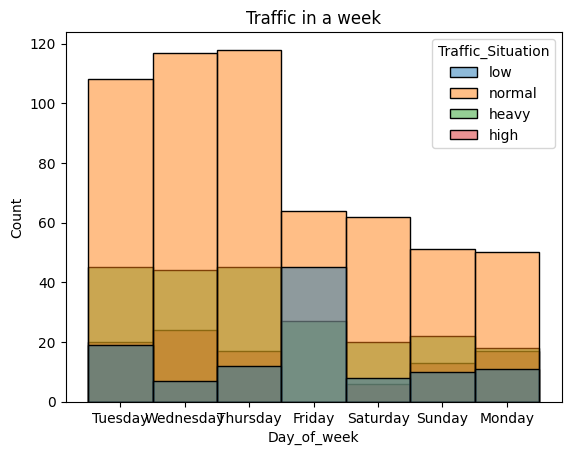

In [11]:
sns.histplot(x='Day_of_week',hue='Traffic_Situation',data=df,color='Green').set(title='Traffic in a week')

[Text(0.5, 1.0, 'Traffic in a week')]

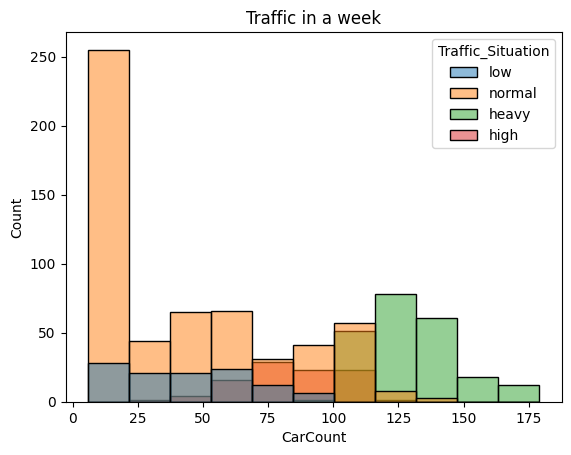

In [12]:
sns.histplot(x='CarCount',hue='Traffic_Situation',data=df).set(title='Traffic in a week')

In [13]:
df.TruckCount.unique()

array([ 4,  3,  6,  5, 16,  7,  1,  0, 10, 14, 11,  2, 29, 21, 24, 30, 15,
       17, 26, 25, 20, 23, 18, 19, 13,  8,  9, 27, 34, 33, 22, 36, 32, 40,
       28, 35, 12, 39, 37, 31, 38])

[Text(0.5, 1.0, 'Traffic in a week')]

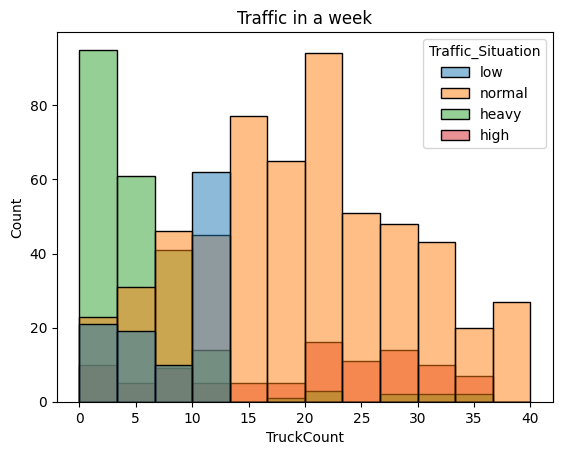

In [14]:
sns.histplot(x='TruckCount',hue='Traffic_Situation',data=df).set(title='Traffic in a week')

[Text(0.5, 1.0, 'Traffic in a week')]

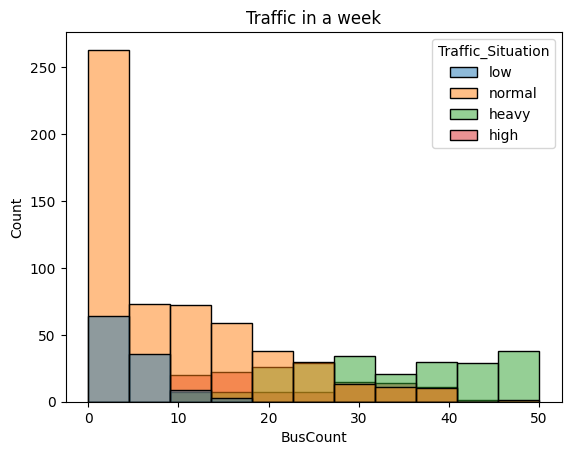

In [15]:
sns.histplot(x='BusCount',hue='Traffic_Situation',data=df).set(title='Traffic in a week')

[Text(0.5, 1.0, 'Traffic in a week')]

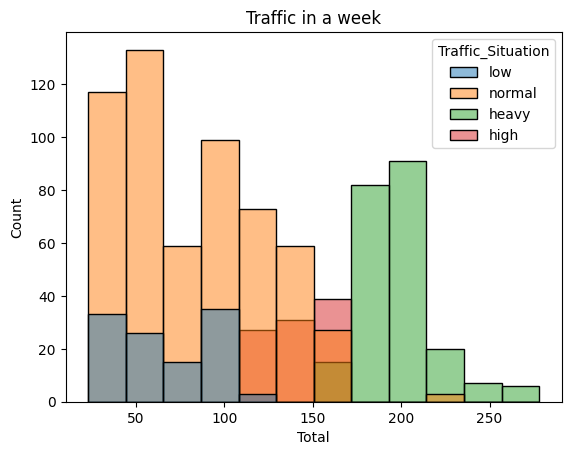

In [16]:
sns.histplot(x='Total',hue='Traffic_Situation',data=df).set(title='Traffic in a week')

In [17]:
df.corr()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.067069,-0.083291,-0.043220,0.098713,-0.061623
CarCount,-0.067069,1.000000,0.719050,0.682363,-0.620959,0.967625
BikeCount,-0.083291,0.719050,1.000000,0.595376,-0.557309,0.803151
BusCount,-0.043220,0.682363,0.595376,1.000000,-0.544306,0.790067
TruckCount,0.098713,-0.620959,-0.557309,-0.544306,1.000000,-0.545208
Total,-0.061623,0.967625,0.803151,0.790067,-0.545208,1.000000


<Axes: >

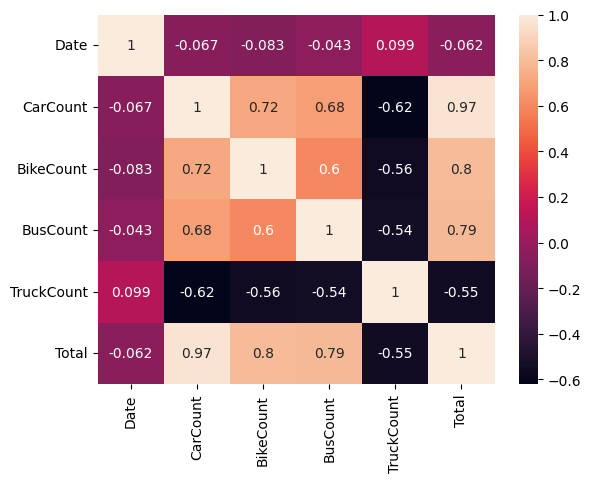

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
# drop unwanted columns
df.drop(['Time','Date'],axis=1,inplace=True)

In [20]:
df['Traffic_Situation']

0         low
1         low
2         low
3         low
4      normal
        ...  
995       low
996    normal
997     heavy
998     heavy
999     heavy
Name: Traffic_Situation, Length: 1000, dtype: object

Mapping

In [21]:
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['Day_of_week'].replace(day_of_week_mapping, inplace=True)


In [22]:
le=LabelEncoder()
df['Traffic_Situation']=le.fit_transform(df['Traffic_Situation'])

In [23]:
df['Traffic_Situation']

0      2
1      2
2      2
3      2
4      3
      ..
995    2
996    3
997    0
998    0
999    0
Name: Traffic_Situation, Length: 1000, dtype: int64

# **Splitting datas into X and y**

In [24]:
X=df.iloc[:,:-1]
X

,Day_of_week,CarCount,BikeCount,BusCount,TruckCount,Total
0,2,31,0,4,4,39
1,2,49,0,3,3,55
2,2,46,0,3,6,55
3,2,51,0,2,5,58
4,2,57,6,15,16,94
...,...,...,...,...,...,...
995,5,66,8,0,12,86
996,5,54,11,0,13,78
997,5,151,48,15,3,217
998,5,170,62,18,2,252


In [25]:
y=df.iloc[:,-1]
y

0      2
1      2
2      2
3      2
4      3
      ..
995    2
996    3
997    0
998    0
999    0
Name: Traffic_Situation, Length: 1000, dtype: int64

# **Data scaling/Normalization.**

In [26]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.16666667, 0.14450867, 0.        , 0.08      , 0.1       ,
        0.0627451 ],
       [0.16666667, 0.24855491, 0.        , 0.06      , 0.075     ,
        0.1254902 ],
       [0.16666667, 0.23121387, 0.        , 0.06      , 0.15      ,
        0.1254902 ],
       ...,
       [0.66666667, 0.83815029, 0.68571429, 0.3       , 0.075     ,
        0.76078431],
       [0.66666667, 0.94797688, 0.88571429, 0.36      , 0.05      ,
        0.89803922],
       [0.66666667, 0.73988439, 0.84285714, 0.22      , 0.075     ,
        0.72156863]])

# **Train and Test**

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

# **Training The Model**

In [28]:
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[knn,sv,gnb,dtc,rf,ad]
algo_accuracy = []
for model in models:
  print('*****************',model,'*********************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('accuracy=',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  algo_accuracy.append(accuracy_score(y_test,y_pred)*100)

***************** KNeighborsClassifier() *********************
accuracy= 89.0
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        74
           1       0.76      0.65      0.70        34
           2       0.92      0.73      0.81        30
           3       0.89      0.96      0.93       162

    accuracy                           0.89       300
   macro avg       0.87      0.81      0.84       300
weighted avg       0.89      0.89      0.89       300

***************** SVC() *********************
accuracy= 90.0
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        74
           1       0.69      0.65      0.67        34
           2       0.92      0.80      0.86        30
           3       0.93      0.94      0.94       162

    accuracy                           0.90       300
   macro avg       0.86      0.84      0.85       300
weighted avg       0.90      0.90      0.90   

In [29]:
print(algo_accuracy)

[89.0, 90.0, 82.66666666666667, 98.0, 99.33333333333333, 54.0]


# **Visualization of Accuracy Score**

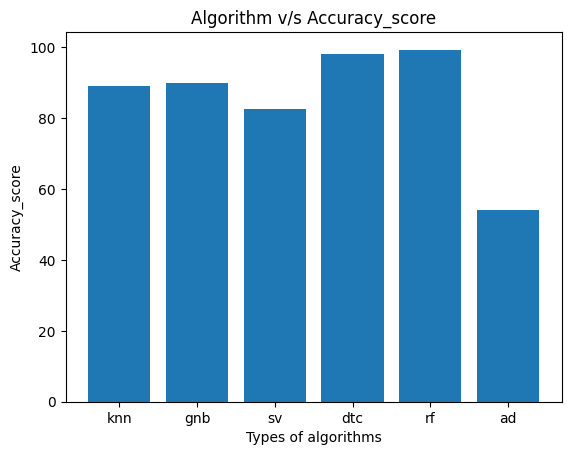

In [30]:
algorithm=['knn','gnb','sv','dtc','rf','ad']
plt.bar(algorithm,algo_accuracy)
plt.plot()
plt.xlabel('Types of algorithms')
plt.ylabel('Accuracy_score')
plt.title('Algorithm v/s Accuracy_score')
plt.show()

In [31]:
df.count()

Day_of_week          1000
CarCount             1000
BikeCount            1000
BusCount             1000
TruckCount           1000
Total                1000
Traffic_Situation    1000
dtype: int64

# **HyperParameter Tuning**


In [32]:
params={'n_estimators':[25,50,100,150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf1=RandomizedSearchCV(rf,params)
model_random = rf1.fit(X_train,y_train)

In [33]:
print(rf1.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=150)


In [34]:
rf1_new=RandomForestClassifier(bootstrap=False, min_samples_leaf=2,min_samples_split=10, n_estimators=150)
rf1_new.fit(X_train,y_train)
rf_y_pred=rf1_new.predict(X_test)
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00       162

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [35]:
print('Accuracy score',accuracy_score(y_test,rf_y_pred)*100)


Accuracy score 100.0


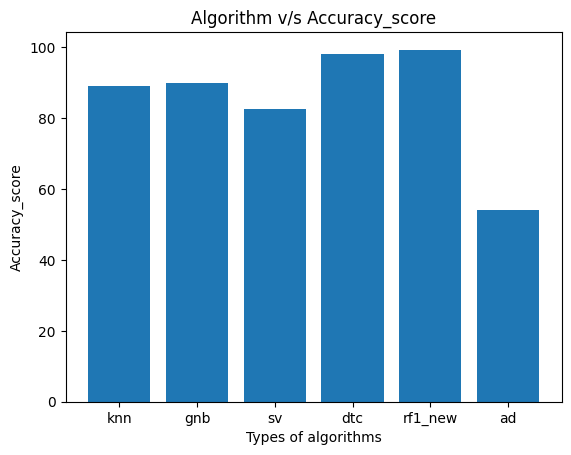

In [36]:
algorithm=['knn','gnb','sv','dtc','rf1_new','ad']
plt.bar(algorithm,algo_accuracy)
plt.plot()
plt.xlabel('Types of algorithms')
plt.ylabel('Accuracy_score')
plt.title('Algorithm v/s Accuracy_score')
plt.show()

In [37]:
y_new=rf1_new.predict(scaler.transform([[2,31,0,4,4,39]]))
# ind=y_new1.argmax()
result=le.inverse_transform(y_new) #need to fit
print(result.item(),':',y_new.item())

low : 2


In [38]:
y_new1=knn.predict(scaler.transform([[2,31,0,4,4,39]]))
result1=le.inverse_transform(y_new1) #need to fit
print(result1.item(),':',y_new1.item())

low : 2


In [39]:
# saving training model
import pickle
filename='Traffic_classification.pkl'
pickle.dump(rf1_new,open(filename,'wb'))
pickle.dump(scaler,open('mscaler.pkl','wb'))
# pickle.dump(y_new,open('ynew.pkl','wb'))

In [40]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [41]:
!wget -q -O - - ipv4.icanhazip.com

34.86.164.65


In [42]:
# !streamlit run app.py & npx localtunnel --port 8501